# Imports

In [55]:
import wrangle_ali as wr
import stats_conclude as sc

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")

# Wrangle

In [61]:
df = wr.wrangle_wine_initial()
df.head()

Acquire Details
CSV found
CSV found
Combined CSV's into one DF
--------------------------------------------
Prepare Details
Renamed columns for ease of use
Encoded Type column


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


# Explore

* Answer the following initial questions:
   1. Do chlorides (sodium) affect quality?
   2. Is free sulfur dioxide related to pH?
   3. Is alcohol content related to residual sugars?
   4. Does alcohol content affect quality of wine?

In [62]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type,type_white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [63]:
# check nulls
df.isnull().sum()

fixed_acidity                0
volatile_acidity             0
citric_acid                  0
residual_sugar               0
sodium                       0
free_SO2_shelf_life          0
total_SO2_processed_level    0
density                      0
pH                           0
preservatives                0
alcohol                      0
quality                      0
type                         0
type_white                   0
dtype: int64

In [64]:
# check value_counts
df.dtypes

fixed_acidity                float64
volatile_acidity             float64
citric_acid                  float64
residual_sugar               float64
sodium                       float64
free_SO2_shelf_life          float64
total_SO2_processed_level    float64
density                      float64
pH                           float64
preservatives                float64
alcohol                      float64
quality                        int64
type                          object
type_white                     uint8
dtype: object

In [65]:
# the actual range is 3-9 not 0-10, outliers...
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [66]:
# check proportions
round((df.type.value_counts(normalize=True)* 100),2)

white    75.39
red      24.61
Name: type, dtype: float64

# Preprocessing

In [67]:
train, validate, test = wr.split_data_stratify(df, 'quality')
train.head()

Prepared DF: (6497, 14)
Train: (3897, 14)
Validate: (1300, 14)
Test: (1300, 14)


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type,type_white
871,7.7,0.34,0.58,11.1,0.039,41.0,151.0,0.99780,3.06,0.49,8.6,5,white,1
2965,5.5,0.34,0.26,2.2,0.021,31.0,119.0,0.98919,3.55,0.49,13.0,8,white,1
2477,6.1,0.27,0.31,1.5,0.035,17.0,83.0,0.99076,3.32,0.44,11.1,7,white,1
673,8.2,0.73,0.21,1.7,0.074,5.0,13.0,0.99680,3.20,0.52,9.5,5,red,0
3115,6.3,0.17,0.32,4.2,0.040,37.0,117.0,0.99182,3.24,0.43,11.3,6,white,1


In [68]:
# variable assignment
X_train = train.drop(columns=('type'))
X_validate = validate.drop(columns=('type'))
X_test = test.drop(columns=('type'))

In [69]:
# scaling variables can send in quality if we want 
X_train_scaled, X_validate_scaled, X_test_scaled = wr.scaler_minmax(X_train, X_validate, X_test)
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white
871,0.322314,0.173333,0.58,0.336570,0.049834,0.138889,0.334101,0.460509,0.251969,0.146893,0.086957,0.333333,1.0
2965,0.140496,0.173333,0.26,0.048544,0.019934,0.104167,0.260369,0.088908,0.637795,0.146893,0.724638,0.833333,1.0
2477,0.190083,0.126667,0.31,0.025890,0.043189,0.055556,0.177419,0.156668,0.456693,0.118644,0.449275,0.666667,1.0
673,0.363636,0.433333,0.21,0.032362,0.107973,0.013889,0.016129,0.417350,0.362205,0.163842,0.217391,0.333333,0.0
3115,0.206612,0.060000,0.32,0.113269,0.051495,0.125000,0.255760,0.202417,0.393701,0.112994,0.478261,0.500000,1.0


# 1. Do chlorides (sodium) affect quality?

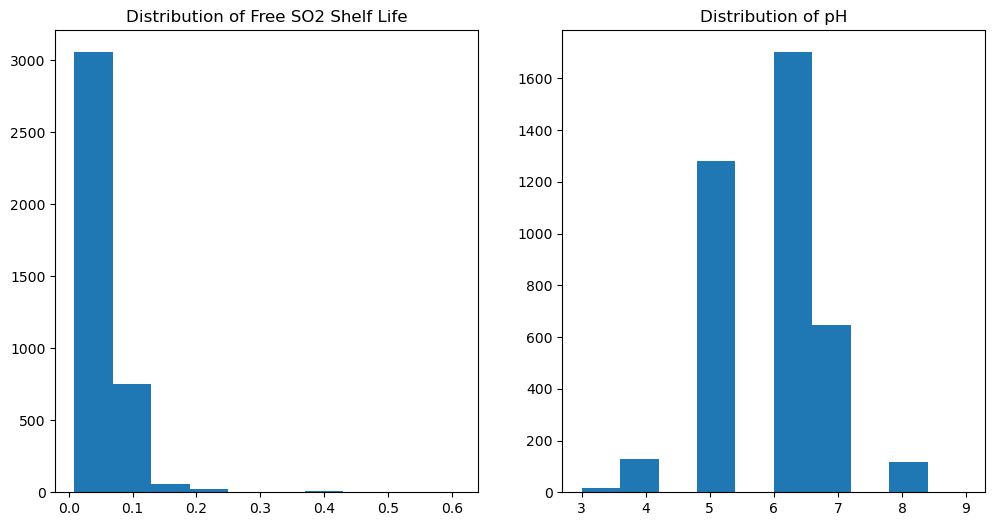

In [70]:
# distribution of free_SO2 and pH
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.sodium)
plt.title('Distribution of Free SO2 Shelf Life')

plt.subplot(122)
plt.hist(train.quality)
plt.title('Distribution of pH')
plt.show()

$H_o$: As the rank of quality increases, the amount of chlorides does not change

$H_a$: As the rank of quality increases, the amount of chlorides does change

In [71]:
# use Spearman's Test for correlation for two continous variables because quality is rank ordered
sc.conclude_spearmanr(train.sodium, train.quality)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.3097438037403542
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


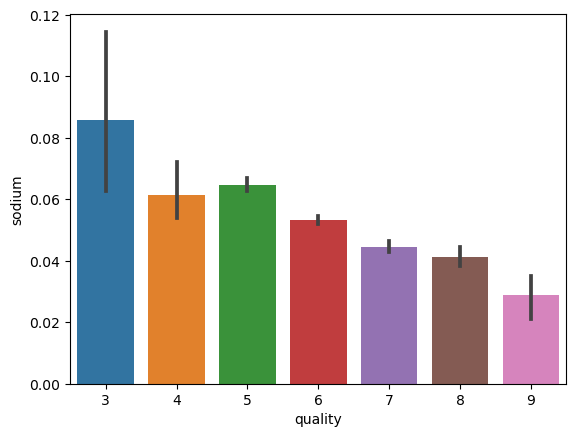

In [72]:
sns.barplot(data=train, x='quality', y='sodium')
plt.show()

# Is free sulfur dioxide related to pH?

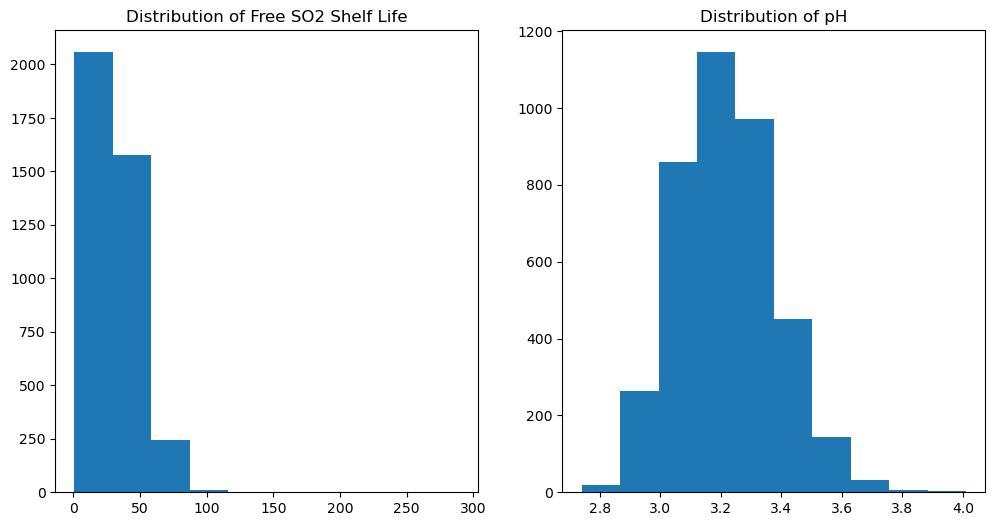

In [73]:
# distribution of free_SO2 and pH
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.free_SO2_shelf_life)
plt.title('Distribution of Free SO2 Shelf Life')

plt.subplot(122)
plt.hist(train.pH)
plt.title('Distribution of pH')
plt.show()

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

In [74]:
# not normal distribution proceed with spearman's correlation test
sc.conclude_spearmanr(train.free_SO2_shelf_life, train.pH)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.15278404229543982
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


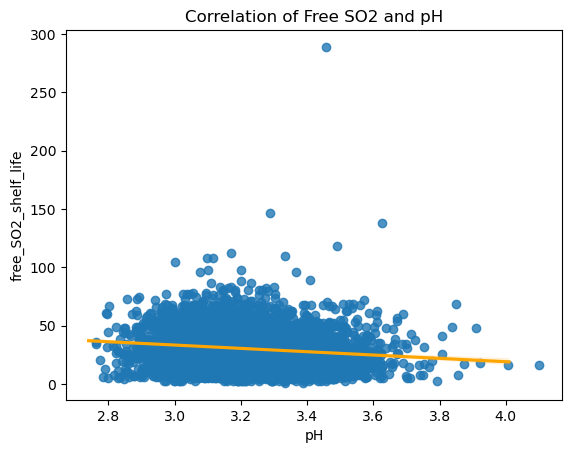

In [75]:
# visualize
sns.regplot(data=train, x='pH', y='free_SO2_shelf_life',x_jitter=.1, line_kws={'color':'orange'})
plt.title("Correlation of Free SO2 and pH")
plt.show()

# 3. Is alcohol content related to residual sugars?

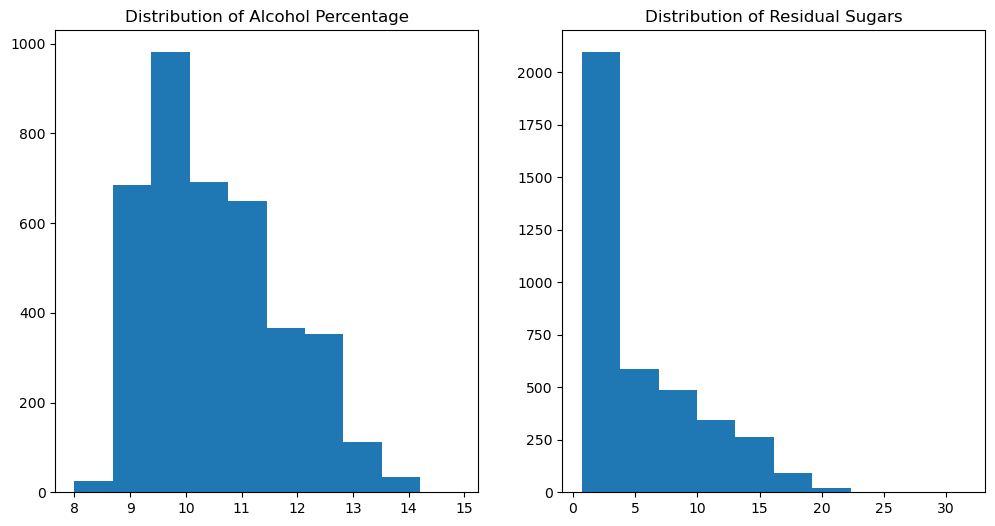

In [76]:
# distribution of alcohol and residual sugars
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.alcohol)
plt.title('Distribution of Alcohol Percentage')

plt.subplot(122)
plt.hist(train.residual_sugar)
plt.title('Distribution of Residual Sugars')
plt.show()

$H_o$: There is no linear relationship

$H_a$: There is a linear relationship

In [77]:
# analyze with spearman's r - assumptions not met for pearson's
sc.conclude_spearmanr(train.alcohol, train.residual_sugar)

Non-Parametric data: Spearman's R test successful...
r (correlation value): -0.31942262018023665
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


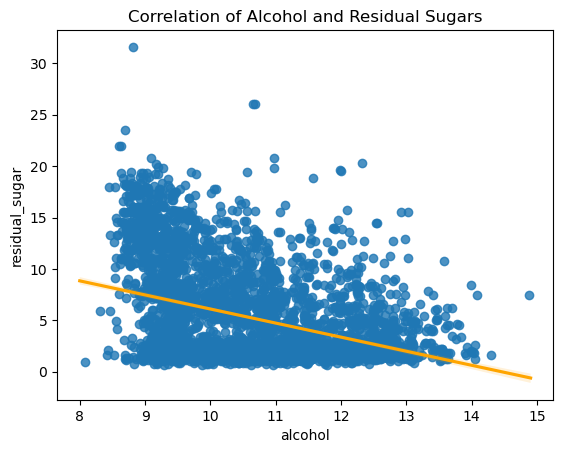

In [78]:
# visualize
sns.regplot(data=train, x='alcohol', y='residual_sugar',x_jitter=.1, line_kws={'color':'orange'})
plt.title("Correlation of Alcohol and Residual Sugars")
plt.show()

# 4. Does alcohol content affect quality of wine?

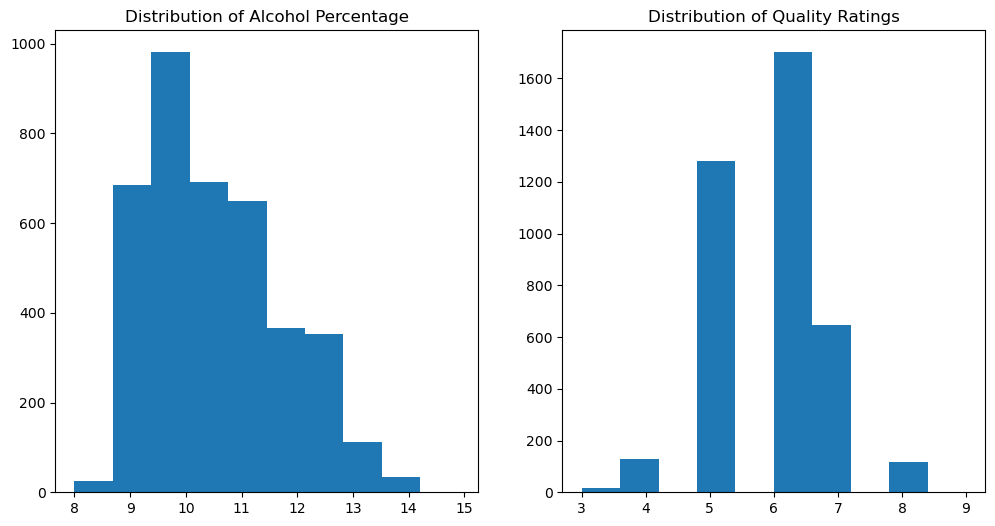

In [79]:
# distribution of alcohol and quality
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.hist(train.alcohol)
plt.title('Distribution of Alcohol Percentage')

plt.subplot(122)
plt.hist(train.quality)
plt.title('Distribution of Quality Ratings')
plt.show()

$H_o$: As the alcohol percentage increases, the rank of quality does not change

$H_a$: As the alcohol percentage increases, the rank of quality does change

In [80]:
# analyze (spearman or pearson - they both get .44)
sc.conclude_pearsonr(train.alcohol, train.quality)

Parametric data: Pearson's R test successful...
r (correlation value): 0.43840078077880545
p-value: 0.0000000000 < 0.05?
----
We can reject the null hypothesis.


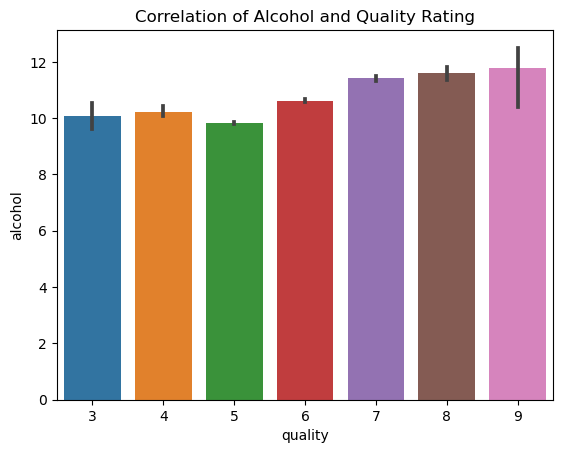

In [81]:
# visualize
sns.barplot(data=train, y='alcohol', x='quality')
plt.title("Correlation of Alcohol and Quality Rating")
plt.show()

### Explore Takeaway:

* Answer the following initial questions:
   1. Do chlorides (sodium) affect quality? <br>
       * Yes, negative relationship (-.31)
   2. Is free sulfur dioxide related to pH? <br>
       * Rejected the null, but barely
   3. Is alcohol content related to residual sugars? <br>
       * Yes, negative relationship (-.32)
   4. Does alcohol content affect quality of wine? <br>
       * Yes, positive relationship (.44)

**Visuals**

* findings for relationship to quality:
    * fixed acidity increases, quality goes down
    * volatile acidity increases, quality goes down - worse than fixed 
    * citric acid has slight positive relationship
    * residual sugar has no relationship - not visually significant
    * chlorides has negative relationship, more chlorides = less quality *super* negative
    * free sulfur dioxide increases quality slightly (look further into type as a 3rd variable)
    * total sulfur dioxide has no signifcance
    * density has negative relationship *significantly* negative
    * pH has no affect on quality
    * preservatives have no affect on quality
    * alcohol is a positive relationship (moderately positive)
    * type has no impact - red is slightly less quality

**Numericals**

* quality range is actually 3-9, not 0-10
    * mean is 5.8
* type has a 75/25 percent proportion
    * white = 75%
    * red = 25%
* pH typical range 0-14
    * wine range 2.72 - 4.01
    * mean 3.2
    * battery acid is a 1, vinegar is 3, tomato juice is a 4


**Feature Engineering**

* total_acidity = fixed + volatile acids
    * contributes directy to quality of wine - negative correlation, higher the acid, lower the quality

# Clustering

**Feature sets to send in:**

* fixed, volatile, citric acid
* residual sugar, alcohol, density
* pH, preservatives, type_white

### Feature Set 1:

* use X_train_scaled
* fixed, volatile, citric acid

In [82]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white
871,0.322314,0.173333,0.58,0.336570,0.049834,0.138889,0.334101,0.460509,0.251969,0.146893,0.086957,0.333333,1.0
2965,0.140496,0.173333,0.26,0.048544,0.019934,0.104167,0.260369,0.088908,0.637795,0.146893,0.724638,0.833333,1.0
2477,0.190083,0.126667,0.31,0.025890,0.043189,0.055556,0.177419,0.156668,0.456693,0.118644,0.449275,0.666667,1.0
673,0.363636,0.433333,0.21,0.032362,0.107973,0.013889,0.016129,0.417350,0.362205,0.163842,0.217391,0.333333,0.0
3115,0.206612,0.060000,0.32,0.113269,0.051495,0.125000,0.255760,0.202417,0.393701,0.112994,0.478261,0.500000,1.0


In [85]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=3, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

# use on X
pred_set_1 = kmeans.predict(X_train_scaled[['fixed_acidity', 'volatile_acidity','citric_acid']])

In [86]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_1'] = pred_set_1
X_train_scaled['cluster_set_1'] = pred_set_1

X_train.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white,cluster_set_1
2669,6.8,0.260,0.40,7.5,0.046,45.0,179.0,0.99583,3.20,0.49,9.3,5,1,2
3532,7.2,0.230,0.46,6.4,0.036,17.0,85.0,0.99279,3.10,0.78,11.7,6,1,2
1487,6.7,0.250,0.74,19.4,0.054,44.0,169.0,1.00040,3.51,0.45,9.8,6,1,1
90,7.2,0.390,0.63,11.0,0.044,55.0,156.0,0.99740,3.09,0.44,8.7,6,1,1
3611,6.8,0.140,0.18,1.4,0.047,30.0,90.0,0.99164,3.27,0.54,11.2,6,1,2
1347,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5,5,0,0
3249,6.4,0.230,0.35,4.6,0.039,43.0,147.0,0.99216,3.18,0.40,11.0,7,1,2
296,10.6,0.830,0.37,2.6,0.086,26.0,70.0,0.99810,3.16,0.52,9.9,5,0,1
500,7.8,0.520,0.25,1.9,0.081,14.0,38.0,0.99840,3.43,0.65,9.0,6,0,0
113,10.1,0.310,0.44,2.3,0.080,22.0,46.0,0.99880,3.32,0.67,9.7,6,0,1


In [87]:
# visualize first numerically
X_train.groupby('quality')['fixed_acidity', 'volatile_acidity','citric_acid'].mean()

,fixed_acidity,volatile_acidity,citric_acid
quality,,,
3,8.155556,0.593056,0.281111
4,7.324615,0.469808,0.283385
5,7.377886,0.391720,0.306919
6,7.132069,0.313407,0.322816
7,7.115301,0.288547,0.332751
8,6.770690,0.280172,0.324483
9,7.700000,0.290000,0.366667


In [ ]:
# cluster is numerical currently, must change to string to use HUE paramater
# X_train['cluster_set_1'] = 'c_' + X_train.cluster_set_1.astype(str)

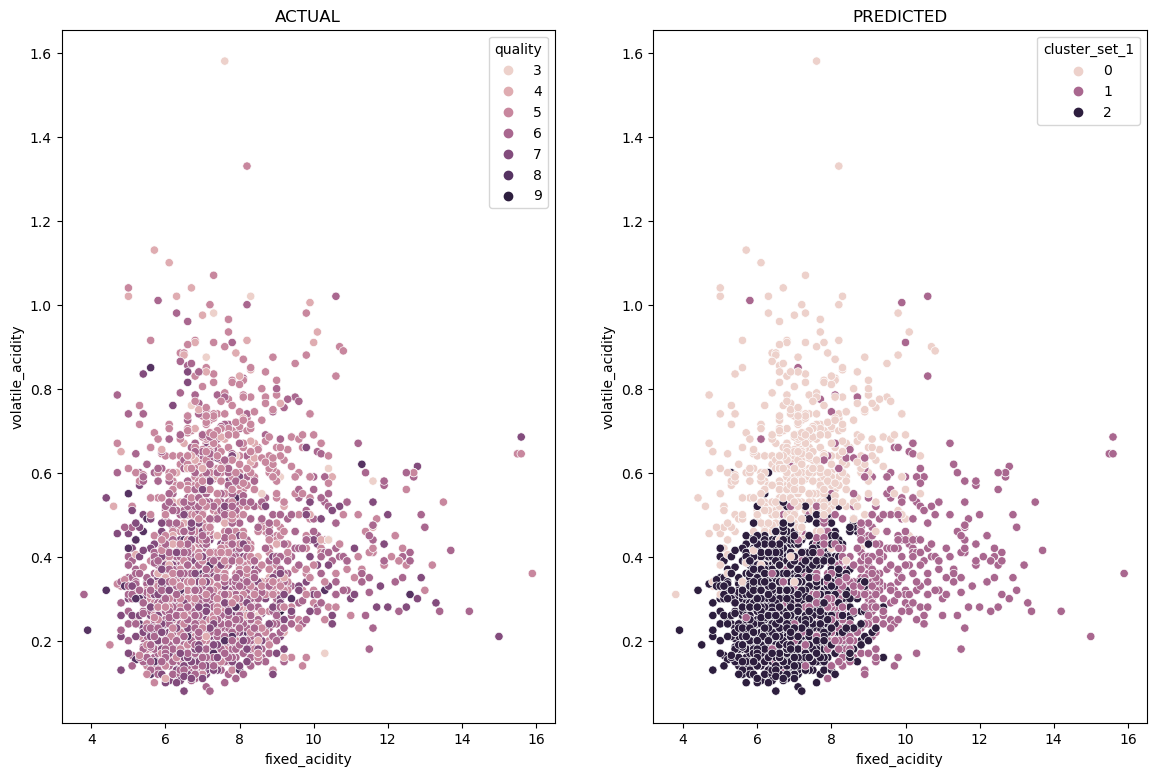

In [92]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, x='fixed_acidity', y='volatile_acidity', hue='quality')
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, x='fixed_acidity', y='volatile_acidity', hue='cluster_set_1')
plt.title('PREDICTED')
plt.show()

### Feature Set 2:

* use X_train_scaled
* residual sugar, alcohol, density

In [82]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white
871,0.322314,0.173333,0.58,0.336570,0.049834,0.138889,0.334101,0.460509,0.251969,0.146893,0.086957,0.333333,1.0
2965,0.140496,0.173333,0.26,0.048544,0.019934,0.104167,0.260369,0.088908,0.637795,0.146893,0.724638,0.833333,1.0
2477,0.190083,0.126667,0.31,0.025890,0.043189,0.055556,0.177419,0.156668,0.456693,0.118644,0.449275,0.666667,1.0
673,0.363636,0.433333,0.21,0.032362,0.107973,0.013889,0.016129,0.417350,0.362205,0.163842,0.217391,0.333333,0.0
3115,0.206612,0.060000,0.32,0.113269,0.051495,0.125000,0.255760,0.202417,0.393701,0.112994,0.478261,0.500000,1.0


In [93]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=3, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['residual_sugar', 'alcohol','density']])

# use on X
pred_set_2 = kmeans.predict(X_train_scaled[['residual_sugar', 'alcohol','density']])

In [94]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_2'] = pred_set_2
X_train_scaled['cluster_set_2'] = pred_set_2

X_train.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white,cluster_set_1,cluster_set_2
2737,7.4,0.20,0.28,9.1,0.047,29.0,95.0,0.99532,3.16,0.47,9.8,7,1,2,0
3078,7.1,0.28,0.35,3.5,0.028,35.0,91.0,0.99022,2.96,0.33,12.1,5,1,2,2
3999,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,1,2,1
1098,6.5,0.29,0.25,10.6,0.039,32.0,120.0,0.99620,3.31,0.34,10.1,6,1,2,0
862,4.8,0.34,0.00,6.5,0.028,33.0,163.0,0.99390,3.36,0.61,9.9,6,1,0,1
2277,7.4,0.14,0.30,1.3,0.033,25.0,91.0,0.99268,3.53,0.39,10.6,6,1,2,1
782,6.9,0.22,0.37,15.0,0.053,59.0,178.0,0.99920,3.37,0.82,9.5,7,1,2,0
88,7.1,0.43,0.61,11.8,0.045,54.0,155.0,0.99740,3.11,0.45,8.7,5,1,1,0
926,9.4,0.24,0.33,2.3,0.061,52.0,73.0,0.99786,3.47,0.90,10.2,6,0,1,1
342,10.9,0.39,0.47,1.8,0.118,6.0,14.0,0.99820,3.30,0.75,9.8,6,0,1,1


In [95]:
# visualize first numerically
X_train.groupby('quality')['residual_sugar', 'alcohol','density'].mean()

,residual_sugar,alcohol,density
quality,,,
3,4.333333,10.086111,0.996332
4,3.971538,10.227308,0.994870
5,5.771724,9.832241,0.995896
6,5.512816,10.621830,0.994432
7,4.790340,11.407584,0.993065
8,5.161207,11.593966,0.992533
9,4.733333,11.766667,0.992400


In [96]:
# cluster is numerical currently, must change to string to use HUE paramater
# X_train['cluster_set_1'] = 'c_' + X_train.cluster_set_1.astype(str)

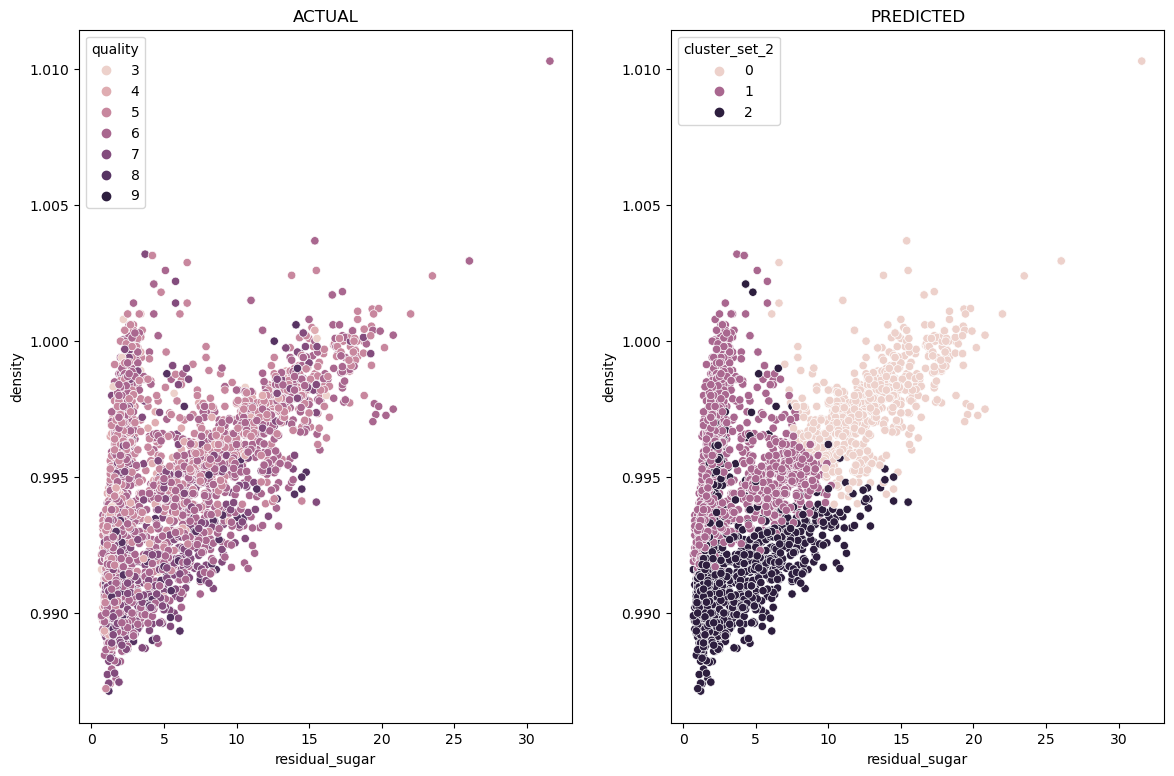

In [97]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, x='residual_sugar', y='density', hue='quality')
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, x='residual_sugar', y='density', hue='cluster_set_2')
plt.title('PREDICTED')
plt.show()

### Feature Set 3:

* use X_train_scaled
* pH, preservatives, type_white

In [82]:
X_train_scaled.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white
871,0.322314,0.173333,0.58,0.336570,0.049834,0.138889,0.334101,0.460509,0.251969,0.146893,0.086957,0.333333,1.0
2965,0.140496,0.173333,0.26,0.048544,0.019934,0.104167,0.260369,0.088908,0.637795,0.146893,0.724638,0.833333,1.0
2477,0.190083,0.126667,0.31,0.025890,0.043189,0.055556,0.177419,0.156668,0.456693,0.118644,0.449275,0.666667,1.0
673,0.363636,0.433333,0.21,0.032362,0.107973,0.013889,0.016129,0.417350,0.362205,0.163842,0.217391,0.333333,0.0
3115,0.206612,0.060000,0.32,0.113269,0.051495,0.125000,0.255760,0.202417,0.393701,0.112994,0.478261,0.500000,1.0


In [98]:
# make and fit the kmeans thing
# make

kmeans = KMeans(n_clusters=3, random_state=123)

# fit on X
kmeans.fit(X_train_scaled[['pH', 'preservatives','type_white']])

# use on X
pred_set_3 = kmeans.predict(X_train_scaled[['pH', 'preservatives','type_white']])

In [99]:
# add cluster prediction back onto X_train and X_train_scaled dataframe

X_train['cluster_set_3'] = pred_set_3
X_train_scaled['cluster_set_3'] = pred_set_3

X_train.sample(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,sodium,free_SO2_shelf_life,total_SO2_processed_level,density,pH,preservatives,alcohol,quality,type_white,cluster_set_1,cluster_set_2,cluster_set_3
1106,5.2,0.24,0.45,3.80,0.027,21.0,128.0,0.99200,3.55,0.49,11.2,8,1,2,2,2
1862,7.3,0.13,0.31,2.30,0.054,22.0,104.0,0.99240,3.24,0.92,11.5,7,1,2,2,2
3461,6.7,0.24,0.30,3.85,0.042,105.0,179.0,0.99189,3.04,0.59,11.3,8,1,2,2,0
110,7.8,0.56,0.19,1.80,0.104,12.0,47.0,0.99640,3.19,0.93,9.5,5,0,0,1,1
3293,6.8,0.17,0.35,1.80,0.040,29.0,84.0,0.98961,2.91,0.57,12.0,7,1,2,2,0
816,9.8,0.51,0.19,3.20,0.081,8.0,30.0,0.99840,3.23,0.58,10.5,6,0,0,1,1
1200,6.8,0.18,0.37,1.50,0.027,37.0,93.0,0.99200,3.30,0.45,10.8,6,1,2,2,2
3928,6.6,0.32,0.47,15.60,0.063,27.0,173.0,0.99872,3.18,0.56,9.0,5,1,2,0,0
3538,6.5,0.28,0.25,4.80,0.029,54.0,128.0,0.99074,3.17,0.44,12.2,7,1,2,2,0
1323,9.1,0.36,0.39,1.80,0.060,21.0,55.0,0.99495,3.18,0.82,11.0,7,0,1,1,1


In [100]:
# visualize first numerically
X_train.groupby('quality')['pH', 'preservatives','type_white'].mean()

,pH,preservatives,type_white
quality,,,
3,3.277222,0.534444,0.555556
4,3.231462,0.506308,0.715385
5,3.212956,0.529337,0.677067
6,3.216955,0.529377,0.784832
7,3.229134,0.544080,0.828439
8,3.240086,0.523103,0.905172
9,3.296667,0.516667,1.000000


In [96]:
# cluster is numerical currently, must change to string to use HUE paramater
# X_train['cluster_set_1'] = 'c_' + X_train.cluster_set_1.astype(str)

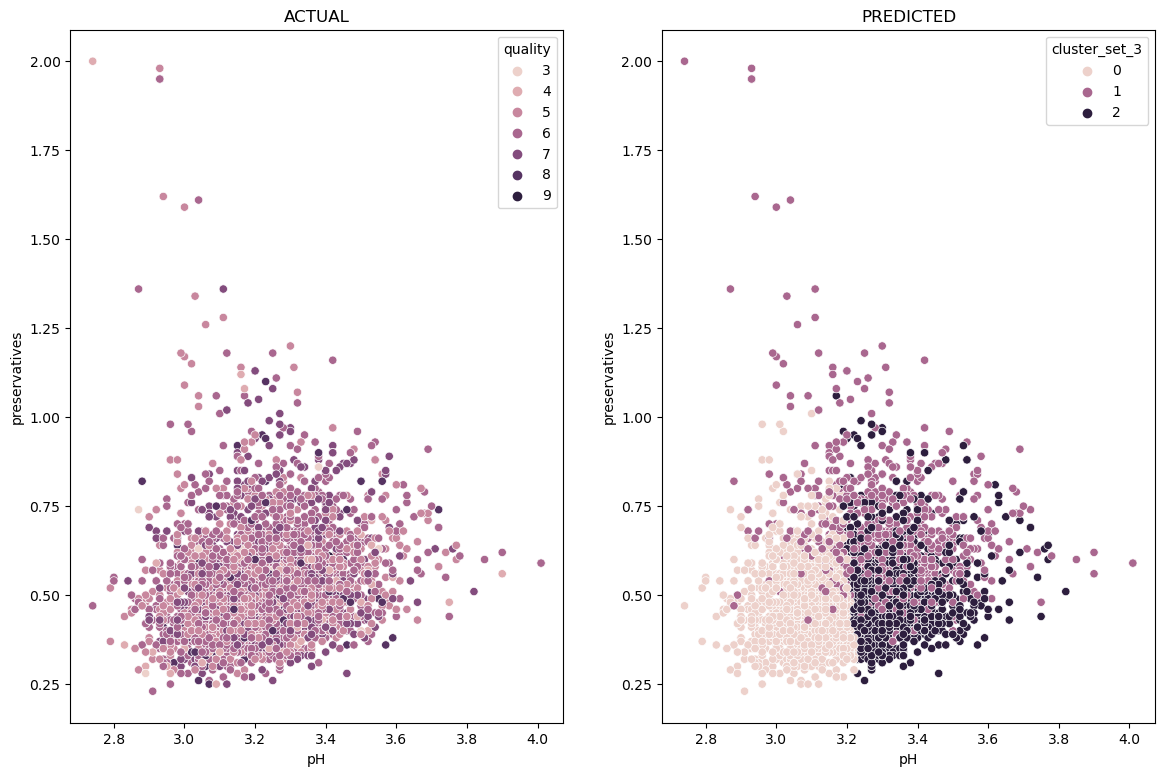

In [101]:
# graphically
plt.figure(figsize=(14, 9))

plt.subplot(121)
sns.scatterplot(data=train, x='pH', y='preservatives', hue='quality')
plt.title('ACTUAL')

plt.subplot(122)
sns.scatterplot(data=X_train, x='pH', y='preservatives', hue='cluster_set_3')
plt.title('PREDICTED')
plt.show()

# Clustering Takeaways:

* There don't seem to be any *actual* clusters...